## Tree-based model

## Decision Tree
![](https://lh5.googleusercontent.com/cbVP3soFqK97RdfNp3uHGUsU9ZfWYBemZEHGSUhegVcqffb-QGYT---Y9IDFMHGi5uHCdYIX4xtmICoNx9UCuoEYWsFCzut2sbnnssd_d_jkQv5t5cIHd-beiA74D0CllHVDlY1tCT4cu6pGOg)


![](https://cdn-images-1.medium.com/max/824/0*J2l5dvJ2jqRwGDfG.png)

![](https://static.javatpoint.com/tutorial/machine-learning/images/decision-tree-classification-algorithm.png)

## How decision tree work?
-> How Decision Tree work.docx

In [6]:
import math
entropy_example = -(3/8*math.log(3/8,2)+5/8*math.log(5/8,2))
entropy_example

0.9544340029249649

## Case study 1 Pima Indian Diabetes

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [39]:
diabetes = pd.read_csv("diabetes.csv")
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 0:no diabites 1: diabites

In [41]:
diabetes.rename(columns = {'Pregnancies':'pregnant', 'Glucose':'glucose','BloodPressure':'bp',
                           'SkinThickness':'skin','Insulin':'insulin','BMI':'bmi',
                           'DiabetesPedigreeFunction':'pedigree','Age':'age','Outcome':'label'},inplace =True)
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes[feature_cols] # Features
y = diabetes.label # Target variable

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [44]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier() #clf: classifier

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


In [45]:
from sklearn.metrics import confusion_matrix,classification_report
C = confusion_matrix(y_test,y_pred)
confusionMatrix = pd.DataFrame(data = C, index=['no_dia(0), true','dia(1), true'], 
                               columns = ['no_dia(0), predicted','dia(1), predicted'])
confusionMatrix.loc['sum'] = confusionMatrix.sum()
confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
confusionMatrix

,"no_dia(0), predicted","dia(1), predicted",sum
"no_dia(0), true",113,33,146
"dia(1), true",41,44,85
sum,154,77,231


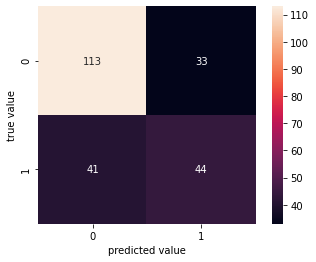

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(y_test,y_pred)
sns.heatmap(C,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       146
           1       0.57      0.52      0.54        85

    accuracy                           0.68       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.67      0.68      0.68       231



In [18]:
# danh gia gi ve mo hinh decision tree?
# loai 0 du bao tuong doi on, loai 1 du bao kem, mo hinh du bao ko tot
# -> vi sao du bao ko tot:  1. it observation,  2. DecisionTree se manh o cac bien categorical va decisiontree co tinh logic cao

In [19]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=5) # tach ra 5 tap train test va tinh accuracy

array([0.73376623, 0.68831169, 0.66233766, 0.81045752, 0.76470588])

In [21]:
x

array([0.72077922, 0.67532468, 0.68831169, 0.80392157, 0.73856209])

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545933329/output_57_0_livyu1.png)

![](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1545933328/output_65_0_jteora.png)

## Case study 2

In [22]:
import pandas as pd
purchase = pd.read_csv('Social_Network_Ads.csv')
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [23]:
purchase.head()
#Purchased : 0-> don't buy, 1 buy

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [25]:
purchase['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [28]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # LE: label encoder
purchase['sex'] = le.fit_transform(purchase['Gender'])
print(purchase['Gender'][:5])
print(purchase['sex'][:5]) # trong bang chu cai, F dung truoc M -> F = 0, M = 1

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object
0    1
1    1
2    0
3    0
4    1
Name: sex, dtype: int32


In [29]:
feature_cols = ['sex','Age','EstimatedSalary']
X = purchase[feature_cols]
y = purchase['Purchased']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [31]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


Text(83.40000000000006, 0.5, 'true value')

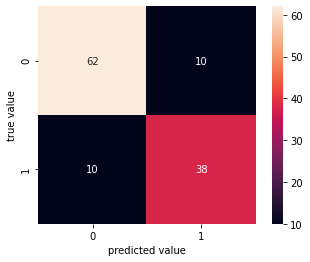

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
C = confusion_matrix(y_test,y_pred)
sns.heatmap(C, square= True, fmt = 'd', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        72
           1       0.79      0.79      0.79        48

    accuracy                           0.83       120
   macro avg       0.83      0.83      0.83       120
weighted avg       0.83      0.83      0.83       120



In [36]:
#mo hinh da tot chua?
# danh gia variance bang validation score
from sklearn.model_selection import cross_val_score
x=cross_val_score(clf,X,y,cv=5)
x.mean()

0.8074999999999999